# Setups

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir("drive/MyDrive/sodium")

In [3]:
!pip3 install twint

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 46.5 MB/s 
     |████████████████████████████████| 263 kB 57.6 MB/s 
     |████████████████████████████████| 382 kB 52.1 MB/s 
     |████████████████████████████████| 291 kB 48.6 MB/s 
     |████████████████████████████████| 144 kB 41.6 MB/s 
     |████████████████████████████████| 94 kB 2.9 MB/s 
     |████████████████████████████████| 271 kB 51.9 MB/s 
     |████████████████████████████████| 49 kB 5.0 MB/s 
     |████████████████████████████████| 59 kB 6.9 MB/s 
     |████████████████████████████████| 138 kB 45.1 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
  Created wheel for twint: filename=twint-2.1.20-py3-none-any.whl size=33929 sha256=625757d8b3a127d7a1e40fd7c82dfd3a3a522dbf54e1b348231d9a80a05ddb22
  Stored in directory: /root/.cache/pip/wheels/44/fc/77/99887a36b5c265a87516158858697d1a0b8f32c4d4dbddbb24
  Created wheel

In [4]:
!pip install nest_asyncio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import twint
import nest_asyncio
nest_asyncio.apply()

In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from wordcloud import WordCloud
import datetime

# Twint

https://colab.research.google.com/github/CALDISS-AAU/sdsphd19_coursematerials/blob/master/notebooks/Tweet_search_twint.ipynb#scrollTo=w1VSc-YxknvE


https://github.com/twintproject/twint

https://github.com/twintproject/twint/wiki/Configuration

In [ ]:
# Configure
keyword = "sodium"
c = twint.Config()
c.Search = keyword
c.Limit = 100
c.Store_csv = True
c.Output = ("tweet_" + keyword  + ".csv")
c.Since = "2020-11-26"
#c.Until = "2020-12-27"
c.Lang = "en"
c.Count = True
c.Stats = True
c.Pandas = True

In [ ]:
# Run
twint.run.Search(c)

1540372542825058304 2022-06-24 16:33:27 +0000 <binisgf> @hyobeepbeep Sodium 😩😭😭💀💀💀💀 | 0 replies 0 retweets 0 likes
1540372483076853760 2022-06-24 16:33:13 +0000 <ka_kigo_ri> @Nat_V_sodium_4 ナトさんのフローラちゃん可愛いじゃないですか～～～～！！ユエシャンも格好良いし～～～！！！あと自分はナトさんのタイリー先生RP大好きです、頼りがいがあるおじいちゃん先生……朗らかな笑いに癒されます…… | 0 replies 0 retweets 0 likes
1540372207838576640 2022-06-24 16:32:07 +0000 <hyobeepbeep> hindi nakakalabag sa loob istream yung lagi mv unlike sodium sodium sodium emz | 1 replies 0 retweets 0 likes
1540371652273266688 2022-06-24 16:29:55 +0000 <Nat_V_sodium_4> @Outrance_m ｴｪﾝ裏切られた！　でもロイドも十分振り回されてますよ！　一緒に胃薬飲みましょ！　ロイドも今以上に苦労してください！（無茶振り | 0 replies 0 retweets 1 likes
1540371511676215301 2022-06-24 16:29:21 +0000 <JoeSodium> @Asthmadriel That clears up some things. Now, why did someone put an eagle and a flag into a transporter pod at the same time? | 1 replies 0 retweets 1 likes
1540371509344083968 2022-06-24 16:29:21 +0000 <stevegraham> @fedejack @milosgajdos It’s not hard really. Just gotta power 

In [ ]:
df = twint.storage.panda.Tweets_df
df.shape

(13249, 38)

# Summary stats

In [7]:
df.columns

NameError: ignored

In [ ]:
# filters 
df = df.query("language=='en'")
df.shape

(7864, 38)

In [ ]:
np.unique(df['timezone'])

array(['+0000'], dtype=object)

In [ ]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df['ninteractions'] = df['nlikes'] + df['nreplies'] + df['nretweets']
np.unique(df['year'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

array([2022])

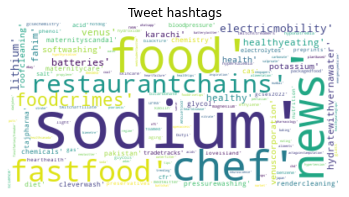

In [ ]:
hashtags = []
for lst in df['hashtags'].values:
  if len(lst) > 0:
    hashtags.extend(lst)
wordcloud = WordCloud(collocations = False, background_color = 'white').generate(str(hashtags))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Tweet hashtags")
plt.show()

In [ ]:
df_grouped = (df.groupby(df.date.dt.day).agg({
    'id': ['count'], 
    'ninteractions': ['mean']
    }))
df_grouped

,id,ninteractions
,count,mean
date,,
14,20,40.950000
15,661,4.062027
16,879,7.916951
17,923,4.124594
18,753,5.903054
19,722,5.534626
20,813,4.560886
21,879,8.786121


In [ ]:
df_grouped.columns

MultiIndex([(           'id', 'count'),
            ('ninteractions',  'mean')],
           )

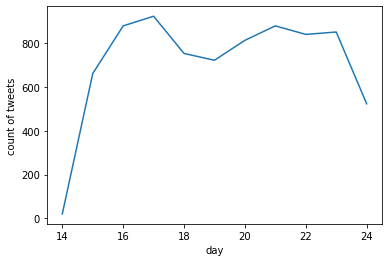

In [ ]:
plt.plot(df_grouped[('id', 'count')])
plt.xlabel("day")
plt.ylabel("count of tweets")
plt.show()


In [ ]:
geotag